In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url='https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'
df=pd.read_csv(url,sep=',')
print(df.head())

   Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11          14        3            2         2   

   Price  
0  62000  
1  78000  
2  58000  
3  45000  
4  45000  


In [3]:
df.describe(include='all')

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

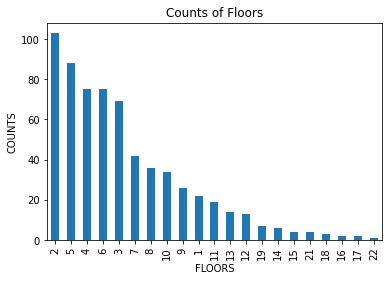

In [5]:
df['Floor'].value_counts().plot(kind='bar')
plt.title('Counts of Floors')
plt.xlabel('FLOORS')
plt.ylabel('COUNTS')
sns.despine

In [6]:
#from the above plot we could see that the most number of people prefer 2 floors

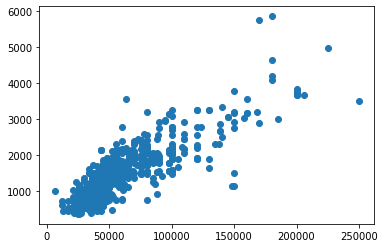

In [7]:
plt.scatter(df.Price,df.Sqft)

In [12]:
df['price per sqft']=df['Price']/df['Sqft']
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,price per sqft
0,1,1177.698,2,7,2,2,2,62000,52.645075
1,2,2134.800,5,7,4,2,2,78000,36.537381
2,3,1138.560,5,7,2,2,1,58000,50.941540
3,4,1458.780,2,7,3,2,2,45000,30.847695
4,5,967.776,11,14,3,2,2,45000,46.498363


In [14]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [31]:
arr=df.values
X = df.drop('Price',axis='columns')
X = df.drop('price per sqft',axis='columns')

y = df.Price
print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)


X matrix dimensionality: (645, 8)
Y vector dimensionality: (645,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=2)

In [33]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred =knn.predict(X_test)
print(y_pred) 


[ 60000  58000  43000  50000 138888  52000 110000  30000  60000  70000
  78000 180000  38000  70000  88000  37000  75000  45000  35000  75000
 150000  75000  45000  65000  36000  85000  25000  36000  45000  80000
  48000 130000  55000  65000  58000  80000  40000  48000  90000  49999
  98000  29500  98000  50000  42000  55000  28000  26000 100000  55000
  45000  28000  48000  30000 110000  41000  45000  65000  39000  36000
  29500  36000  39000  68000 150000  36000  38000  50000  60000 120000
  37000  55000 150000  40000  36000  43000  33000  26000  30000  68000
  55000  80000  50000  36000  49800  39000 180000  70000  48000  55000
  39000  70000  31000 100000  43000  45000  45000  35000  48000  55000
  39000  22000 130000 140000 100000  22000  70000  90000  58000  33000
  55000  75000  65000  65000  40000  40000  57000  38000  57000  42000
  55000  31000  45000  45000  50000 150000  45000  75000 180000  41000
  45000  35000  55000  80000  40000  25000  28000  52000  37000 110000
 12000

In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=15, scoring='accuracy')
print(scores)

E:\python\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(


[0.76744186 0.79069767 0.74418605 0.76744186 0.76744186 0.81395349
 0.76744186 0.76744186 0.76744186 0.72093023 0.69767442 0.72093023
 0.79069767 0.81395349 0.79069767]


In [55]:
print(scores.mean())

0.7658914728682169


In [37]:
k_range = range(1, 15) 
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=15, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

E:\python\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(
E:\python\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(
E:\python\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(
E:\python\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(
E:\python\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(
E:\python\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated 

[0.8015503875968991, 0.7224806201550388, 0.7844961240310077, 0.7658914728682169, 0.7658914728682169, 0.7565891472868215, 0.7519379844961239, 0.7488372093023253, 0.7457364341085271, 0.7271317829457363, 0.7209302325581394, 0.7131782945736432, 0.6899224806201549, 0.6744186046511627]


E:\python\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(


Text(0, 0.5, 'Cross-Validated Accuracy')

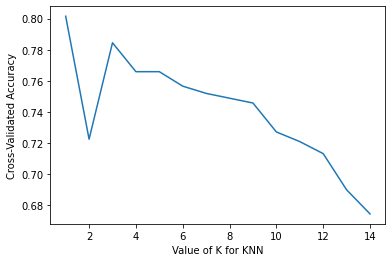

In [38]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [43]:
knn = KNeighborsClassifier(n_neighbors=14)
print(scores)

[0.6744186  0.6744186  0.6744186  0.74418605 0.72093023 0.72093023
 0.69767442 0.6744186  0.69767442 0.62790698 0.58139535 0.60465116
 0.65116279 0.6744186  0.69767442]


In [44]:
print(scores.mean())

0.6744186046511627


In [59]:
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, y, cv=15, scoring='accuracy')
print(scores)

E:\python\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(


[0.81395349 0.8372093  0.69767442 0.76744186 0.79069767 0.90697674
 0.79069767 0.81395349 0.86046512 0.79069767 0.79069767 0.81395349
 0.81395349 0.81395349 0.72093023]


In [60]:
print('The accuracy for the value of k=1 is',(scores.mean())*100,'%')

The accuracy for the value of k=1 is 80.15503875968992 %
